In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.optimizers import RMSprop
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.callbacks import CSVLogger
import math
import numpy as np
from livelossplot import PlotLossesKeras

C:\Users\abhij\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
img_width,img_height = 256,256
epochs = 10
batch_size = 8
test_size = 1
input_shape = (img_width,img_height,3)
MODEL_FILE = 'newm.h5'

In [4]:
model = Sequential()

model.add(Conv2D(32, 3, 3, border_mode='same', input_shape=input_shape, activation='relu'))
model.add(Conv2D(32, 3, 3, border_mode='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, 3, 3, border_mode='same', activation='relu'))
model.add(Conv2D(64, 3, 3, border_mode='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, 3, 3, border_mode='same', activation='relu'))
model.add(Conv2D(128, 3, 3, border_mode='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, 3, 3, border_mode='same', activation='relu'))
model.add(Conv2D(256, 3, 3, border_mode='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1))
model.add(Activation('sigmoid'))
    
model.compile(loss='binary_crossentropy',
            optimizer=RMSprop(lr=0.0001),
            metrics=['accuracy'])

C:\Users\abhij\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(256, 256,..., activation="relu", padding="same")`
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\abhij\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", padding="same")`
  after removing the cwd from sys.path.
C:\Users\abhij\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", padding="same")`
  import sys
C:\Users\abhij\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", padding="same")`
  
C:\Users\abhij\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` 

In [5]:
training_data_generator = ImageDataGenerator(rescale=1./255)
test_data_generator = ImageDataGenerator(rescale=1./255)
training_data_dir = './Dataset/Train data'
test_data_dir = './test'
training_generator = training_data_generator.flow_from_directory(
    training_data_dir,
    target_size=(img_width,img_height),
    batch_size=batch_size,
    class_mode="binary")
test_generator = test_data_generator.flow_from_directory(
    test_data_dir,
    target_size=(img_width,img_height),
    batch_size=1,
    class_mode="binary", 
    shuffle=False)

Found 8071 images belonging to 2 classes.
Found 0 images belonging to 0 classes.


In [8]:
classes = training_generator.class_indices
print(classes)

{'Negative data': 0, 'Positive data': 1}


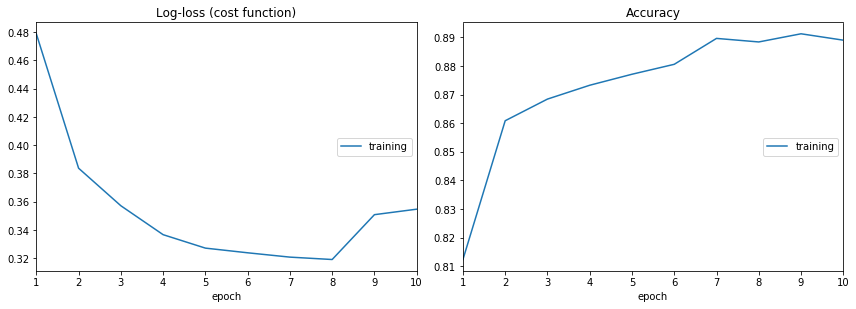

Log-loss (cost function):
training   (min:    0.319, max:    0.479, cur:    0.355)

Accuracy:
training   (min:    0.812, max:    0.891, cur:    0.889)


NameError: name 'MODEL_FILE' is not defined

In [19]:
model.fit_generator(
    training_generator,
    steps_per_epoch=len(training_generator.filenames) // batch_size,
    epochs=epochs,
    callbacks=[PlotLossesKeras(), CSVLogger("training_logs.csv",
                                            append=False,
                                            separator=";")], 
    verbose=1)


In [21]:
model.save_weights(MODEL_FILE)